In [0]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from mapsplotlib import mapsplot as mplt
mplt.register_api_key('AIzaSyBbc_******************')

In [3]:
df = pd.read_csv("domiporta-search.csv", 
                 sep="|", header=None, error_bad_lines=False, na_values=["None"])
df.columns = ["page","ID","title","url","descr","rooms","area","price_m2","price"]
del(df["page"])
df.drop_duplicates(subset=["ID","title"], inplace=True)

b'Skipping line 80: expected 9 fields, saw 15\nSkipping line 81: expected 9 fields, saw 10\nSkipping line 82: expected 9 fields, saw 15\nSkipping line 83: expected 9 fields, saw 10\nSkipping line 216: expected 9 fields, saw 10\nSkipping line 217: expected 9 fields, saw 10\nSkipping line 688: expected 9 fields, saw 18\nSkipping line 689: expected 9 fields, saw 17\nSkipping line 690: expected 9 fields, saw 17\nSkipping line 696: expected 9 fields, saw 19\nSkipping line 1790: expected 9 fields, saw 13\nSkipping line 1791: expected 9 fields, saw 13\nSkipping line 1792: expected 9 fields, saw 13\nSkipping line 2061: expected 9 fields, saw 10\nSkipping line 2298: expected 9 fields, saw 10\nSkipping line 2299: expected 9 fields, saw 10\nSkipping line 2300: expected 9 fields, saw 10\nSkipping line 2438: expected 9 fields, saw 14\nSkipping line 2446: expected 9 fields, saw 15\nSkipping line 2448: expected 9 fields, saw 15\nSkipping line 2454: expected 9 fields, saw 12\nSkipping line 2456: expec

In [4]:
df.head()

,ID,title,url,descr,rooms,area,price_m2,price
0,151276336,"mieszkanie Warszawa, Mokotów, Bielawska",/nieruchomosci/sprzedam-mieszkanie-dwupokojowe...,Ładne dwupokojowe mieszkanie na Górnym Mokotow...,2.0,"36,60 m2",10 874 zł/m2,398 000 zł
1,150965188,"mieszkanie Warszawa, Ursynów, ul. Rumby",/nieruchomosci/sprzedam-mieszkanie-warszawa-ur...,Mieszkanie dwupoziomowe z zagospodarowanym pod...,5.0,120 m2,14 583 zł/m2,1 750 000 zł
2,151297823,"mieszkanie Warszawa, Mokotów, STĘPIŃSKA przy Ł...",/nieruchomosci/sprzedam-mieszkanie-dwupokojowe...,Odnowiona kamienica z lat 50 -tych z cegły bar...,2.0,50 m2,11 900 zł/m2,595 000 zł
3,151282421,"mieszkanie Warszawa, Śródmieście, DOM BEZ KANT...",/nieruchomosci/sprzedam-mieszkanie-czteropokoj...,"Krakowskie Przedmieście róg Królewskiej, DOM B...",4.0,"115,82 m2",21 585 zł/m2,2 500 000 zł
4,151032628,"mieszkanie Warszawa, Mokotów, PLAC UNII LUBELS...",/nieruchomosci/sprzedam-mieszkanie-czteropokoj...,Mieszkanie 4 - pokojowe (pierwotnie 3 - pokojo...,4.0,98 m2,14 796 zł/m2,1 450 000 zł


In [5]:
df.shape

(38241, 8)

In [0]:
df = df[df.title.str.startswith("mieszkanie") & (df.rooms>=1) & (df.rooms<=6)]
df.rooms = df.rooms.astype('uint8')
df.area = df.area.apply(lambda s: str(s).replace(" ","").replace("m2","").replace(",",".")).astype('float')

In [0]:
df.price_m2 = df.price_m2.apply(lambda s: str(s).replace(" ","").\
                          replace("zł/m2","").replace(",",".").replace('\xa0','')).astype('float')

In [0]:
df.price = df.price.replace("Zapytaj o cenę", pd.np.NaN)

In [0]:
df.price = df.price.apply(lambda s: str(s).replace(" ","").\
                          replace("zł","").replace(",",".").replace('\xa0','')).astype('float')

In [10]:
df.shape

(25113, 8)

In [11]:
df.head()

,ID,title,url,descr,rooms,area,price_m2,price
0,151276336,"mieszkanie Warszawa, Mokotów, Bielawska",/nieruchomosci/sprzedam-mieszkanie-dwupokojowe...,Ładne dwupokojowe mieszkanie na Górnym Mokotow...,2,36.60,10874.0,398000.0
1,150965188,"mieszkanie Warszawa, Ursynów, ul. Rumby",/nieruchomosci/sprzedam-mieszkanie-warszawa-ur...,Mieszkanie dwupoziomowe z zagospodarowanym pod...,5,120.00,14583.0,1750000.0
2,151297823,"mieszkanie Warszawa, Mokotów, STĘPIŃSKA przy Ł...",/nieruchomosci/sprzedam-mieszkanie-dwupokojowe...,Odnowiona kamienica z lat 50 -tych z cegły bar...,2,50.00,11900.0,595000.0
3,151282421,"mieszkanie Warszawa, Śródmieście, DOM BEZ KANT...",/nieruchomosci/sprzedam-mieszkanie-czteropokoj...,"Krakowskie Przedmieście róg Królewskiej, DOM B...",4,115.82,21585.0,2500000.0
4,151032628,"mieszkanie Warszawa, Mokotów, PLAC UNII LUBELS...",/nieruchomosci/sprzedam-mieszkanie-czteropokoj...,Mieszkanie 4 - pokojowe (pierwotnie 3 - pokojo...,4,98.00,14796.0,1450000.0


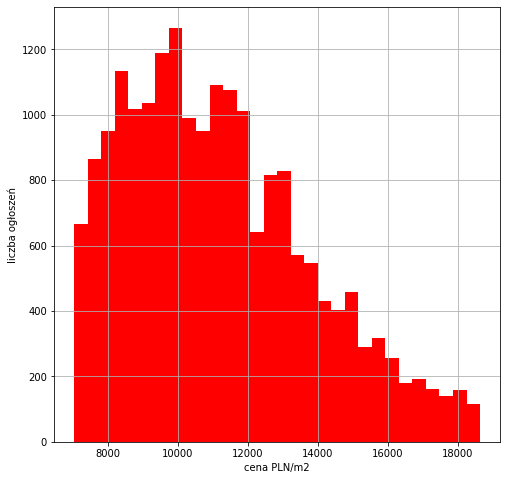

In [12]:
range_m2_min = df.price_m2.quantile(0.05)
range_m2_max = df.price_m2.quantile(0.95)
df.price_m2[df.price_m2.between(range_m2_min, range_m2_max)].hist(bins=30, color='red', figsize=(8,8))
plt.xlabel('cena PLN/m2')
plt.ylabel('liczba ogłoszeń')
plt.show()

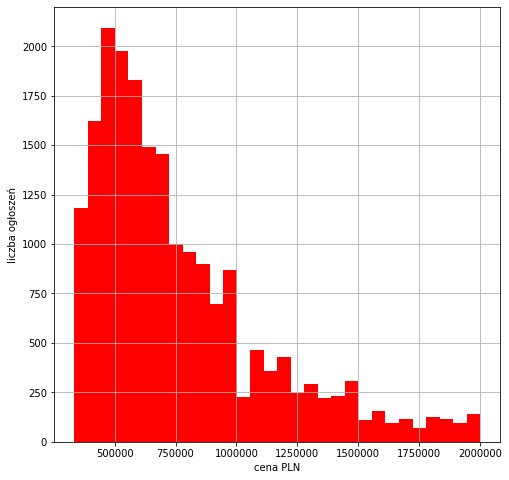

In [13]:
range_price_min = df.price.quantile(0.05)
range_price_max = df.price.quantile(0.95)
df.price[df.price.between(range_price_min, range_price_max)].hist(bins=30, color='red', figsize=(8,8))
plt.xlabel('cena PLN')
plt.ylabel('liczba ogłoszeń')
plt.show()

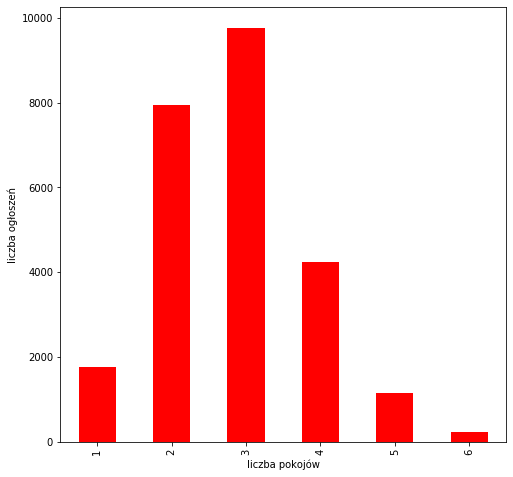

In [14]:
df.rooms.value_counts().sort_index().plot(kind='bar', color='red', figsize=(8,8))
plt.xlabel('liczba pokojów')
plt.ylabel('liczba ogłoszeń')
plt.show()

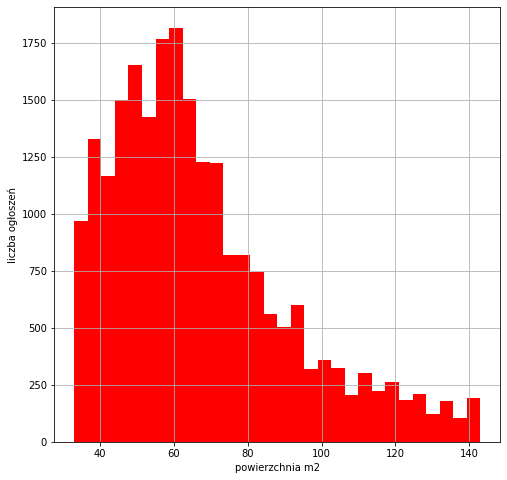

In [15]:
range_area_min = df.area.quantile(0.05)
range_area_max = df.area.quantile(0.95)
df.area[df.area.between(range_area_min, range_area_max)].hist(bins=30, color='red', figsize=(8,8))
plt.xlabel('powierzchnia m2')
plt.ylabel('liczba ogłoszeń')
plt.show()

In [16]:
df

,ID,title,url,descr,rooms,area,price_m2,price
0,151276336,"mieszkanie Warszawa, Mokotów, Bielawska",/nieruchomosci/sprzedam-mieszkanie-dwupokojowe...,Ładne dwupokojowe mieszkanie na Górnym Mokotow...,2,36.60,10874.0,398000.0
1,150965188,"mieszkanie Warszawa, Ursynów, ul. Rumby",/nieruchomosci/sprzedam-mieszkanie-warszawa-ur...,Mieszkanie dwupoziomowe z zagospodarowanym pod...,5,120.00,14583.0,1750000.0
2,151297823,"mieszkanie Warszawa, Mokotów, STĘPIŃSKA przy Ł...",/nieruchomosci/sprzedam-mieszkanie-dwupokojowe...,Odnowiona kamienica z lat 50 -tych z cegły bar...,2,50.00,11900.0,595000.0
3,151282421,"mieszkanie Warszawa, Śródmieście, DOM BEZ KANT...",/nieruchomosci/sprzedam-mieszkanie-czteropokoj...,"Krakowskie Przedmieście róg Królewskiej, DOM B...",4,115.82,21585.0,2500000.0
4,151032628,"mieszkanie Warszawa, Mokotów, PLAC UNII LUBELS...",/nieruchomosci/sprzedam-mieszkanie-czteropokoj...,Mieszkanie 4 - pokojowe (pierwotnie 3 - pokojo...,4,98.00,14796.0,1450000.0
...,...,...,...,...,...,...,...,...
38632,103820507,"mieszkanie Warszawa, Wilanów, Przyczółkowa",/nieruchomosci/sprzedam-mieszkanie-warszawa-wi...,"rynek pierwotny, apartamenty z ogródkami, więc...",6,NaN,6141.0,1200000.0
38634,114326271,"mieszkanie Warszawa, Śródmieście, Nowy Świat",/nieruchomosci/sprzedam-mieszkanie-dwupokojowe...,Śródmieście - przy Nowym Świecie.Budynek z 195...,2,57.00,14018.0,799000.0
38635,114326218,"mieszkanie Warszawa, Mokotów, Stary Mokotów, A...",/nieruchomosci/sprzedam-mieszkanie-dwupokojowe...,"Mieszkanie w kamienicy z 1933r ,po wymianie in...",2,63.00,9365.0,590000.0
38636,114178412,"mieszkanie Warszawa, Ursynów, Lasek Brzozowy",/nieruchomosci/sprzedam-mieszkanie-trzypokojow...,"bardzo dobra lokalizacja, niski budynek,dużo z...",3,NaN,7346.0,490000.0


In [17]:
df1 = pd.read_csv("domiporta-details.csv", 
                  sep=';', index_col='ID')
df1 = df1[ df1.columns[1:] ]
df1

,Kategoria,Lokalizacja,Cena,Cena za m2,Typ budynku,Materiał,Liczba pokoi,Piętro,Liczba pięter w budynku,Rok budowy,Powierzchnia całkowita,Informacje dodatkowe,Numer oferty,Kredyt,descr,Okolica,Forma własności,Powierzchnia piwnicy,Kuchnia,Dostępne od,Czynsz,Mieszkanie,Powierzchnia działki,Powierzchnia mieszkalna,Kształt działki
ID,,,,,,,,,,,,,,,,,,,,,,,,,
151277107,Mieszkania na sprzedaż,województwo: mazowieckie powiat: Warszawa gm...,600 000 zł,"6 666,67 zł/m2",inny,inny,4.0,1,2.0,2020.0,90 m2,"miejsce parkingowe, balkon",199306,Sprawdź ratę!,Inwestycja położona jest w Józefosławiu tuż pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151105797,Mieszkania na sprzedaż,województwo: mazowieckie powiat: Warszawa gm...,439 000 zł,"8 025,59 zł/m2",inny,wielka płyta,3.0,Parter,12.0,1970.0,"54,70 m2","winda, piwnica, loggia",AL932413,Sprawdź ratę!,"Do zakupu ustawne, ciche 3 pokoje na zielonej ...","park, las, apteka, tramwaj, autobus, przedszko...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150920467,Mieszkania na sprzedaż,województwo: mazowieckie powiat: Warszawa mi...,2 150 000 zł,17 200 zł/m2,inny,cegła,6.0,Parter,2.0,1935.0,125 m2,"garaż, ogródek",GPN-MS-10487,Sprawdź ratę!,Mieszkanie na parterze przedwojennej trzylokal...,NaN,Hipoteczne,10 m2,oddzielna widna,NaN,NaN,NaN,NaN,NaN,NaN
central_garden_apartments_warszawa-zoliborz_544326,Mieszkania na sprzedaż,województwo: mazowieckie powiat: warszawski ...,NaN,NaN,NaN,NaN,3.0,1,9.0,2021.0,"62,63 m2","loggia, plac zabaw, teren zamknięty, winda, łą...",A095,Sprawdź ratę!,Central Garden Apartments to inwestycja położo...,"park / las, tramwaj, centrum handlowe, sklep s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151338624,Mieszkania na sprzedaż,województwo: mazowieckie powiat: Warszawa gm...,1 400 000 zł,"11 864,41 zł/m2",inny,inny,4.0,5,NaN,2011.0,118 m2,winda,HH-MS-582839,Sprawdź ratę!,Do sprzedania mieszkanie z tarasem i widokiem ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151262957,Mieszkania na sprzedaż,województwo: Mazowieckie powiat: Warszawa gm...,569 000 zł,"11 156,86 zł/m2",blok,cegła,2.0,2,3.0,2008.0,51 m2,balkon,23982/3069/OMS,Sprawdź ratę!,"Do sprzedania przestronne, 2-pokojowe mieszkan...",NaN,własność,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151116710,Mieszkania na sprzedaż,województwo: mazowieckie powiat: Warszawa gm...,1 570 000 zł,"11 652,07 zł/m2",inny,inny,5.0,5,5.0,2018.0,"134,74 m2","winda, miejsce parkingowe, balkon, loggia",N+118318,Sprawdź ratę!,Oferuję Państwu apartament w eleganckiej kamie...,"park, apteka, metro, tramwaj, autobus, pkp, pr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151332178,Mieszkania na sprzedaż,województwo: mazowieckie miejscowość: Warsza...,263 888 zł,"7 750,01 zł/m2",inny,cegła,2.0,Parter,2.0,2021.0,"34,05 m2",garaż,95901,Sprawdź ratę!,"0% PROWIZJI!! Inwestycja od dewelopera, bez PC...",NaN,własność,NaN,aneks,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df1.columns

Index(['Kategoria', 'Lokalizacja', 'Cena', 'Cena za m2', 'Typ budynku',
       'Materiał', 'Liczba pokoi', 'Piętro', 'Liczba pięter w budynku',
       'Rok budowy', 'Powierzchnia całkowita', 'Informacje dodatkowe',
       'Numer oferty', 'Kredyt', 'descr', 'Okolica', 'Forma własności',
       'Powierzchnia piwnicy', 'Kuchnia', 'Dostępne od', 'Czynsz',
       'Mieszkanie', 'Powierzchnia działki', 'Powierzchnia mieszkalna',
       'Kształt działki'],
      dtype='object')

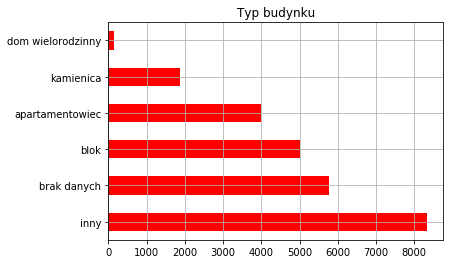

In [19]:
df1["Typ budynku"].replace(pd.np.NaN, 'brak danych').value_counts().plot(kind='barh', grid=True, color='red')
plt.title("Typ budynku")
plt.show()

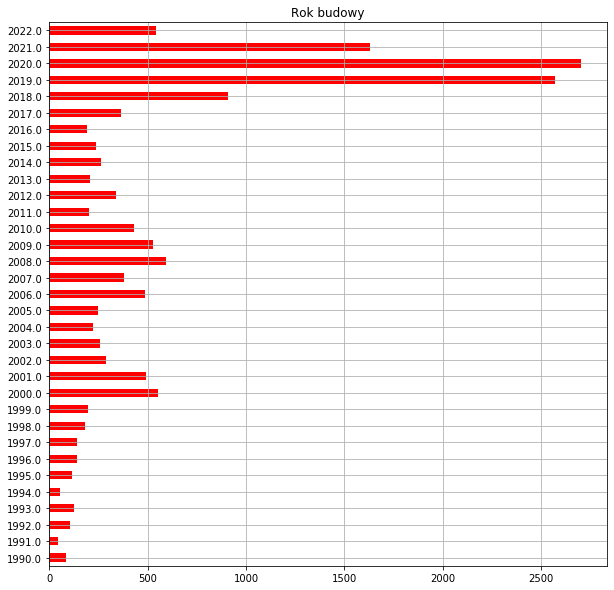

In [20]:
df1["Rok budowy"][df1["Rok budowy"].between(1990,2025)].\
    replace(pd.np.NaN, 'brak danych').value_counts().sort_index().\
    plot(kind='barh', grid=True, color='red', figsize=(10,10))
plt.title("Rok budowy")
plt.show()

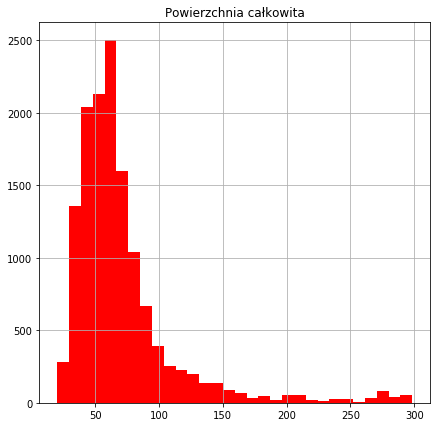

In [21]:
area = df1["Powierzchnia całkowita"][~df1["Powierzchnia całkowita"].isnull()].\
        replace("[A-Za-z ]","", regex=True).\
        replace(",",".", regex=True).apply(lambda s: str(s).replace('\xa0','')).\
        astype('float')
area[(area>=20)&(area<=300)].hist(color='red', bins=30, figsize=(7,7))
plt.title("Powierzchnia całkowita")
plt.show()

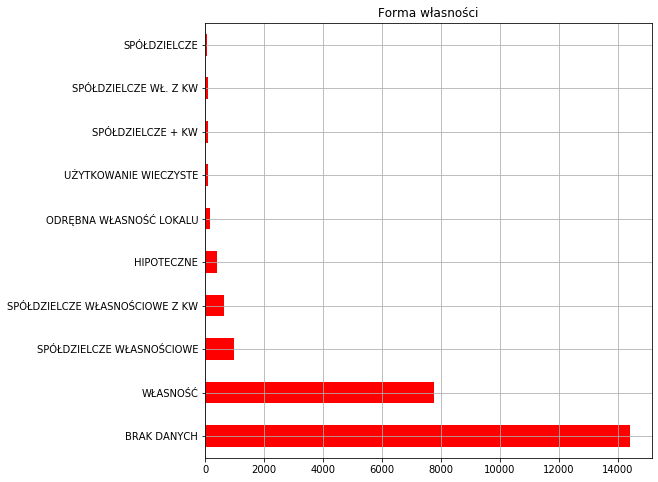

In [22]:
fw = df1["Forma własności"].str.upper()
fw.replace(pd.np.NaN,'BRAK DANYCH', inplace=True)
fw.value_counts().sort_values().nlargest(10).plot(kind='barh', figsize=(8,8), color='red', grid=True)
plt.title('Forma własności')
plt.show()

In [35]:
gps = pd.read_csv("ulice-gps.txt", 
                  header=None, sep=";", usecols=[1])
gps = gps[1].str.split(",", expand=True).replace("None",pd.np.NaN).dropna().astype('float')
gps.columns = ['latitude','longitude']
gps = gps[ (gps.longitude>=20.847061)&(gps.longitude<=21.223435)
        &(gps.latitude>=52.01699)&(gps.latitude<=52.383149) ]
gps

,latitude,longitude
0,52.245247,21.216075
1,52.160543,21.211243
2,52.191476,20.981025
3,52.262795,21.037988
4,52.185075,20.958077
...,...,...
3128,52.183823,20.979117
3129,52.240824,20.985010
3130,52.239605,20.976641
3131,52.238842,20.966304


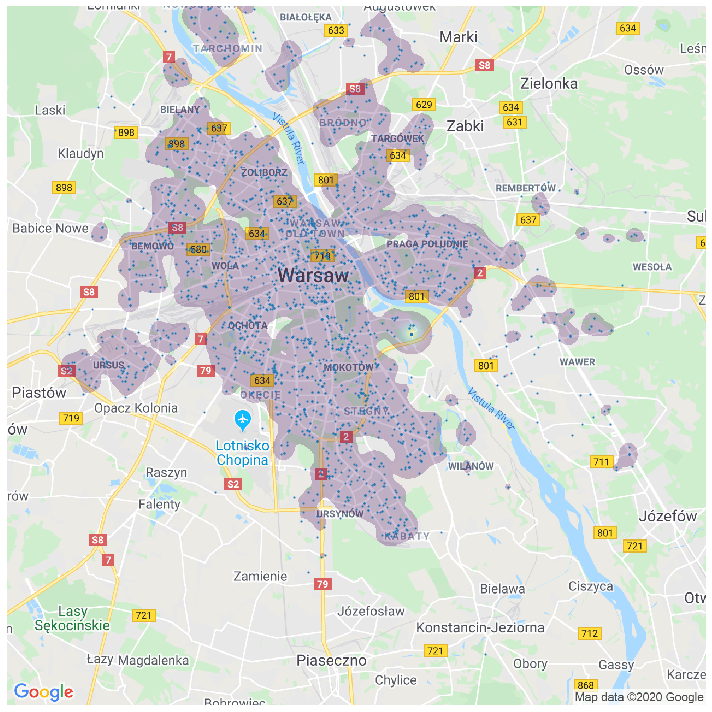

<Figure size 1332x756 with 0 Axes>

In [36]:
mplt.density_plot(gps['latitude'], gps['longitude'])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [0]:
gps_list = []
for row in gps.values:
  gps_list.append(f"[{row[0]},{row[1]}]")

s = ",".join(gps_list)
s = "var locations = [ " + s + " ];";
with open("points.js","wt") as fd:
  fd.write(s)